In [2243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as sma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
from sklearn.metrics import r2_score, mean_squared_error
filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,precision_score,classification_report,plot_roc_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report

## Understanding the data 

In [2244]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [2245]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2247]:
train.isnull().sum()/len(train)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [2248]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [2249]:
for i in train.columns:
    print()
    print(train[i].value_counts())


LP002180    1
LP001792    1
LP001497    1
LP001552    1
LP002877    1
           ..
LP002530    1
LP001199    1
LP001326    1
LP002692    1
LP001606    1
Name: Loan_ID, Length: 614, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     

## Imputing null Values


In [2250]:
import seaborn as sns

In [2251]:
train['LoanAmount'].skew()

2.677551679256059

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

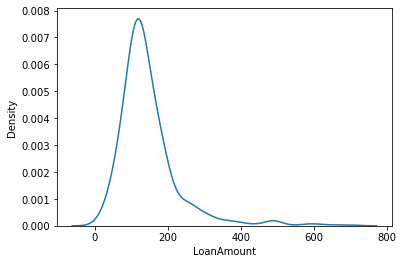

In [2252]:
sns.kdeplot(train['LoanAmount'])

In [2253]:
train['Credit_History'] = train['Credit_History'].fillna(value = 1.0)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(value=360.0)
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())


In [2254]:
train['Dependents'] = train['Dependents'].fillna(value=0)

In [2255]:
train['Self_Employed']= train['Self_Employed'].fillna(value = 'No')

In [2256]:
train['Gender']= train['Gender'].fillna(value = 'Male')

In [2257]:
train['Married']= train['Married'].fillna(value = 'Yes')

In [2258]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2259]:
train['Credit_History'] = train['Credit_History'].astype('object')

In [2260]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1,Urban,Y


## Encoding Categorical Variables:

In [2261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [2262]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [2263]:
Gender_encode = (train.groupby('Gender').size()) / len(train)
Married_encode = (train.groupby('Married').size()) / len(train)
Dependents_encode = (train.groupby('Dependents').size()) / len(train)
Education_encode = (train.groupby('Education').size()) / len(train)
Self_Employed_encode = (train.groupby('Self_Employed').size()) / len(train)
Credit_History_encode = (train.groupby('Credit_History').size()) / len(train)
Property_Area_encode = (train.groupby('Property_Area').size()) / len(train)


In [2264]:
train['Gender'] = train['Gender'].apply(lambda x : Gender_encode[x])
train['Married'] = train['Married'].apply(lambda x : Married_encode[x])
train['Dependents'] = train['Dependents'].apply(lambda x : Dependents_encode[x])
train['Education'] = train['Education'].apply(lambda x : Education_encode[x])
train['Self_Employed'] = train['Self_Employed'].apply(lambda x : Self_Employed_encode[x])
train['Credit_History'] = train['Credit_History'].apply(lambda x : Credit_History_encode[x])
train['Property_Area'] = train['Property_Area'].apply(lambda x : Property_Area_encode[x])

In [2265]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.81759,0.346906,0.561889,0.781759,0.86645,5849,0.0,146.412162,360.0,0.855049,0.328990,Y
1,LP001003,0.81759,0.653094,0.166124,0.781759,0.86645,4583,1508.0,128.000000,360.0,0.855049,0.291531,N
2,LP001005,0.81759,0.653094,0.561889,0.781759,0.13355,3000,0.0,66.000000,360.0,0.855049,0.328990,Y
3,LP001006,0.81759,0.653094,0.561889,0.218241,0.86645,2583,2358.0,120.000000,360.0,0.855049,0.328990,Y
4,LP001008,0.81759,0.346906,0.561889,0.781759,0.86645,6000,0.0,141.000000,360.0,0.855049,0.328990,Y


In [2266]:
status = {'Y':1,'N':0}

In [2267]:
train['Loan_Status'] = train['Loan_Status'].map(status)

In [2268]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.81759,0.346906,0.561889,0.781759,0.86645,5849,0.0,146.412162,360.0,0.855049,0.328990,1
1,LP001003,0.81759,0.653094,0.166124,0.781759,0.86645,4583,1508.0,128.000000,360.0,0.855049,0.291531,0
2,LP001005,0.81759,0.653094,0.561889,0.781759,0.13355,3000,0.0,66.000000,360.0,0.855049,0.328990,1
3,LP001006,0.81759,0.653094,0.561889,0.218241,0.86645,2583,2358.0,120.000000,360.0,0.855049,0.328990,1
4,LP001008,0.81759,0.346906,0.561889,0.781759,0.86645,6000,0.0,141.000000,360.0,0.855049,0.328990,1


In [2269]:
final = train.copy()

In [2270]:
final.drop('Loan_ID',axis=1,inplace = True)

In [2271]:
final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.81759,0.346906,0.561889,0.781759,0.86645,5849,0.0,146.412162,360.0,0.855049,0.328990,1
1,0.81759,0.653094,0.166124,0.781759,0.86645,4583,1508.0,128.000000,360.0,0.855049,0.291531,0
2,0.81759,0.653094,0.561889,0.781759,0.13355,3000,0.0,66.000000,360.0,0.855049,0.328990,1
3,0.81759,0.653094,0.561889,0.218241,0.86645,2583,2358.0,120.000000,360.0,0.855049,0.328990,1
4,0.81759,0.346906,0.561889,0.781759,0.86645,6000,0.0,141.000000,360.0,0.855049,0.328990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.18241,0.346906,0.561889,0.781759,0.86645,2900,0.0,71.000000,360.0,0.855049,0.291531,1
610,0.81759,0.653094,0.083062,0.781759,0.86645,4106,0.0,40.000000,180.0,0.855049,0.291531,1
611,0.81759,0.653094,0.166124,0.781759,0.86645,8072,240.0,253.000000,360.0,0.855049,0.328990,1
612,0.81759,0.653094,0.164495,0.781759,0.86645,7583,0.0,187.000000,360.0,0.855049,0.328990,1


## Editting the test data set

In [2272]:
test1 = test.copy()

In [2273]:
test1.drop('Loan_ID',axis=1,inplace=True)

In [963]:
test1.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [964]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [2274]:
test1['Credit_History'] = test1['Credit_History'].fillna(value = 1.0)
test1['Loan_Amount_Term'] = test1['Loan_Amount_Term'].fillna(value=360.0)
test1['LoanAmount'] = test1['LoanAmount'].fillna(test1['LoanAmount'].mean())

test1['Dependents'] = test1['Dependents'].fillna(value=0)
test1['Self_Employed']= test1['Self_Employed'].fillna(value = 'No')
test1['Gender']= test1['Gender'].fillna(value = 'Male')
test1['Married']= test1['Married'].fillna(value = 'Yes')

In [2275]:
Gender_encode = (test1.groupby('Gender').size()) / len(test1)
Married_encode = (test1.groupby('Married').size()) / len(test1)
Dependents_encode = (test1.groupby('Dependents').size()) / len(test1)
Education_encode = (test1.groupby('Education').size()) / len(test1)
Self_Employed_encode = (test1.groupby('Self_Employed').size()) / len(test1)
Credit_History_encode = (test1.groupby('Credit_History').size()) / len(test1)
Property_Area_encode = (test1.groupby('Property_Area').size()) / len(test1)

In [2276]:
test1['Gender'] = test1['Gender'].apply(lambda x : Gender_encode[x])
test1['Married'] = test1['Married'].apply(lambda x : Married_encode[x])
test1['Dependents'] = test1['Dependents'].apply(lambda x : Dependents_encode[x])
test1['Education'] = test1['Education'].apply(lambda x : Education_encode[x])
test1['Self_Employed'] = test1['Self_Employed'].apply(lambda x : Self_Employed_encode[x])
test1['Credit_History'] = test1['Credit_History'].apply(lambda x : Credit_History_encode[x])
test1['Property_Area'] = test1['Property_Area'].apply(lambda x : Property_Area_encode[x])

In [2277]:
test1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.809264,0.634877,0.544959,0.771117,0.899183,5720,0,110.0,360.0,0.839237,0.381471
1,0.809264,0.634877,0.158038,0.771117,0.899183,3076,1500,126.0,360.0,0.839237,0.381471
2,0.809264,0.634877,0.160763,0.771117,0.899183,5000,1800,208.0,360.0,0.839237,0.381471
3,0.809264,0.634877,0.160763,0.771117,0.899183,2340,2546,100.0,360.0,0.839237,0.381471
4,0.809264,0.365123,0.544959,0.228883,0.899183,3276,0,78.0,360.0,0.839237,0.381471


## Train Test Split

In [2278]:
sc = StandardScaler()
x_train_sc = pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)
x_test_sc = pd.DataFrame(sc.transform(xtest),columns=xtest.columns)

In [2417]:
x = final.drop('Loan_Status',axis=1)
y = final['Loan_Status']
xc = sma.add_constant(x)

In [2881]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=112)

# Machine Learning Models

### 1. Base Model

In [2882]:
import statsmodels.api as sma

In [2883]:
logreg = sma.Logit(ytrain,xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.463528
         Iterations 7


In [2884]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      418
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 Oct 2021   Pseudo R-squ.:                  0.2395
Time:                        03:20:48   Log-Likelihood:                -198.85
converged:                       True   LL-Null:                       -261.46
Covariance Type:            nonrobust   LLR p-value:                 4.393e-22
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Gender               -0.8510      0.568     -1.498      0.134      -1.964       0.262
Married               1.6963      0.914      1.855      0.064      -0.096       3.488
Dependents           -0.

In [2885]:
y_pred_prob = logreg.predict(xtest)

In [2886]:
from sklearn.metrics import confusion_matrix

In [2887]:
y_pred = [0 if x<0.6 else 1 for x in y_pred_prob]

In [2888]:
cm = confusion_matrix(ytest,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
precision = TP/(TP+FP)

In [2889]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        64
           1       0.78      0.96      0.86       121

    accuracy                           0.80       185
   macro avg       0.82      0.73      0.75       185
weighted avg       0.81      0.80      0.78       185



## Random Forest Classifier

In [2547]:
from sklearn.ensemble import RandomForestClassifier

In [2548]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=5,criterion='entropy',min_samples_leaf= 1,min_samples_split=2,)

In [2549]:
rfc_model = rfc.fit(xtrain,ytrain)
rfc_pred = rfc_model.predict(xtest)

In [2550]:
rfc_accuracy = accuracy_score(ytest,rfc_pred)
rfc_accuracy

0.8020304568527918

In [2551]:
print(classification_report(ytest,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.51      0.64        67
           1       0.79      0.95      0.86       130

    accuracy                           0.80       197
   macro avg       0.82      0.73      0.75       197
weighted avg       0.81      0.80      0.79       197



In [2510]:
from sklearn.model_selection import GridSearchCV

In [2376]:
param = {'n_estimators':[50,100,150,200],
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'min_samples_leaf':[1,2,3]}

In [2377]:
grid = GridSearchCV(estimator=rfc,param_grid=param,cv=5)

In [2378]:
grid_model = grid.fit(xtrain,ytrain)

In [2477]:
grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Decision Tree Classifier

In [2552]:
from sklearn.tree import DecisionTreeClassifier

In [2553]:
dtc = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=5)

In [2554]:
dtc_model = dtc.fit(xtrain,ytrain)
dtc_pred = dtc_model.predict(xtest)
dtc_accuracy = accuracy_score(ytest,dtc_pred)
dtc_accuracy

0.7461928934010152

In [2555]:
dtc_model.score(xtest,ytest)

0.7461928934010152

## Logistic Regression

In [2556]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model = lr.fit(xtrain, ytrain)
model.score(xtrain, ytrain)

#Accuracy = (TP+TN) / Total

lr_pred = lr.predict(xtest)

print(classification_report(ytest, lr_pred))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        67
           1       0.79      0.97      0.87       130

    accuracy                           0.81       197
   macro avg       0.84      0.73      0.75       197
weighted avg       0.82      0.81      0.79       197



In [2557]:
lr_accuracy = accuracy_score(ytest,lr_pred)
lr_accuracy

0.8071065989847716

## Gradient Boosting Classifier

In [2558]:
from sklearn.ensemble import GradientBoostingClassifier

In [2559]:
gbc = GradientBoostingClassifier(learning_rate=0.05,
    n_estimators=70)

In [2560]:
gbc_model = gbc.fit(xtrain,ytrain)
gbc_pred = gbc_model.predict(xtest)
gbc_accuracy = accuracy_score(ytest,gbc_pred)
gbc_accuracy

0.7918781725888325

## Ada Boost

In [2597]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(n_estimators=30,learning_rate=0.01)

In [2598]:
adc_model = adc.fit(xtrain,ytrain)
adc_pred = adc_model.predict(xtest)
adc_accuracy = accuracy_score(ytest,adc_pred)
adc_accuracy

0.8071065989847716

In [2890]:
logit_pred_test = logreg.predict(test1)
logit_pred_test

0      0.789129
1      0.812223
2      0.784353
3      0.811380
4      0.654008
         ...   
362    0.812052
363    0.785358
364    0.698170
365    0.771066
366    0.929604
Length: 367, dtype: float64

In [2951]:
y_pred_logreg = [0 if x<0.1029 else 1 for x in logit_pred_test]

In [2952]:
adc_pred_test = adc.predict(test1)

In [2953]:
gbc_pred_test = gbc.predict(test1)

In [2954]:
lr_pred_test = lr.predict(test1)


In [2955]:

rfc_pred_test = rfc.predict(test1)
rfc_pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [2956]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [2957]:
a = test.drop(['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],axis=1)

In [2958]:
b = pd.DataFrame(y_pred_logreg)

In [2959]:
predicted_df = pd.concat([a,b],axis=1)

In [2960]:
predicted_df = predicted_df.rename({0:'Loan_Status'},axis=1)

In [2961]:
d = {1:'Y',0:'N'}

In [2962]:
predicted_df['Loan_Status'] = predicted_df['Loan_Status'].map(d)

In [2963]:
predicted_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [2964]:
predicted_df.to_csv('Loan_logreg111111.csv',index=False)

In [2965]:
predicted_df['Loan_Status'].value_counts()



Y    324
N     43
Name: Loan_Status, dtype: int64